In [141]:
from MCEq.core import config, MCEqRun
import crflux.models as crf
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import numpy as np



# config.e_max = 1000000000.0
# config.e_min = 0.05

from MCEq.core import MCEqRun


# Initalize MCEq by creating the user interface object MCEqRun
mceq = MCEqRun(

    # High-energy hadronic interaction model
    interaction_model='SIBYLL23C',

    # cosmic ray flux at the top of the atmosphere
    primary_model = (crf.HillasGaisser2012, 'H3a'),

    # zenith angle
    theta_deg = 0.
)

# Solve the equation system
mceq.solve()

# Obtain the result
# Multiply fluxes be E**mag to resolve the features of the steep spectrum
mag = 0

neutron_flux = mceq.get_solution('total_n0', mag) + mceq.get_solution('total_nbar0', mag)

mceq.pman.print_particle_tables(0)

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
Hadrons and stable particles:
"pbar-", "p+"

Mixed:
"pi0", "K_L0", "pi-", "pi+", "K_S0", 
"K-", "K+", "D-", "D+", "Dbar0", 
"D0", "D_s-", "D_s+", "nbar0", "n0", 
"Lambdabar0", "Lambda0"

Resonances:


Leptons:
"e+", "e-", "antinue", "nue", "mu+_l", 
"mu+", "mu+_r", "mu-_l", "mu-", "mu-_r", 
"antinumu", "numu", "antinutau", "nutau", "gamma"

Tracking:
"pi_antinue", "pi_nue", "pi_mu+_l", "pi_mu+_r", "pi_mu-_l", 
"pi_mu-_r", "pi_antinumu", "pi_numu", "k_antinue", "k_nue", 
"k_mu+_l", "k_mu+_r", "k_mu-_l", "k_mu-_r", "k_antinumu", 
"k_numu", "mulr_antinue", "mulr_nue", "mulr_antinumu", "mulr_numu", 
"mu_h0_antinue", "mu_h0_nue", "mu_h0_antinumu", "mu_h0_numu", "mu_antinue", 
"mu_nue", "mu_antinumu", "mu_numu", "K0_anti

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def k2p(k, mass=938.27e-3):
    return np.sqrt(k**2+2*k*mass)

def p2k(p, mass=938.27e-3):
    return np.sqrt(p**2+mass**2) - mass

def load_cry(filename):
    # 3:KE[MeV] 4:x[m] y[m] z[m] 7:u v w t[s]

    data_raw = np.loadtxt(filename, skiprows=1, delimiter=" ")
    data = {}
    data["x"] = data_raw[:,4]
    data["y"] = data_raw[:,5]
    data["z"] = data_raw[:,6]
    data["u"] = data_raw[:,7]
    data["v"] = data_raw[:,8]
    data["w"] = data_raw[:,9]
    data["ekin"] = data_raw[:,3]/1000
    data["zenith_angle"] = np.arccos(-data_raw[:,9]/np.linalg.norm(data_raw[:,7:10], axis=1))
    data["p_tot"] = k2p(data["ekin"])
    return data


p_meas_mom = np.array([0.75,1.03,1.53,2.12,2.94,4.5,6.16,10.3,18, 27.5, 79])
p_meas_int = [1.5e-7,8.4e-8, 2.85e-8, 2.26e-8, 7.64e-9, 3.4e-9, 1.4e-9, 4.6e-10, 1.17e-10,2.95e-11,2.3e-12]
p_meas_unc = [0.28e-7,0.75e-8, 0.3e-8, 0.2e-8, 0.88e-9, 0.36e-9, 0.46e-9, 1.2e-10, 0.47e-10, 0.94e-11, 1.4e-12]

golden_1995_energy = np.array([10.74, 5.1, 3.72, 3.10])
golden_1995_int = np.array([6.73e-3, 4.76e-2, 9.81e-2, 1.95e-1]) / 1e7 # From /[m^2 GeV sr s] to /[cm^2 MeV sr s]
golden_1995_unc = golden_1995_int* np.array([0.24,0.22,0.25,0.24]) # Uncertainty given in percentage


diggory_1974_momentum = np.array([1,2,3,5,7,10, 20, 30, 50])
diggory_1974_int = np.array([7.45e-1, 2.37e-1, 1.22e-1, 5.31e-2, 1.66e-2, 3.76e-3, 9.27e-4, 1.2e-4, 1.7e-5]) / 1e7 # From /[m^2 GeV sr s] to /[cm^2 MeV sr s]
diggory_1974_unc = np.array([0.1e-1, 0.5e-1, 0.3e-1, 0.18e-2, 0.09e-2, 0.3e-3, 1.3e-4, abs(0.00007228776177944357-0.00011944409960813494), abs(0.000017011917756344574-0.00000742929610095167)]) / 1e7 # From /[m^2 GeV sr s] to /[cm^2 MeV sr s]

In [67]:
data_dir="/home/tomren/geant_projects/cosmic_comparison"
data_cry = load_cry(f"{data_dir}/output/cry_neutrons_cms_0m.txt")
data_parma = load_cry(f"{data_dir}/output/parma_neutrons_cms_0m.txt")

165536
8969


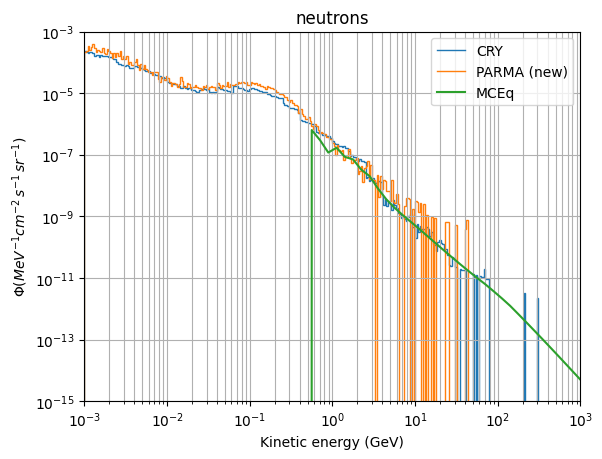

In [115]:

bins = np.logspace(np.log10(0.001), np.log10(600), 300)
binwidth = (bins[1:] - bins[:-1]) * 1000 # Turn to MeV

angle_cut_rad = 0.1
angle_sterad = 2*np.pi*(1-np.cos(angle_cut_rad/2))

# Line 1
cry_area = (10*100)**2
cry_norm = 4180*cry_area*angle_sterad
x = data_cry["ekin"]
mask = np.abs(data_cry["zenith_angle"])<angle_cut_rad
n1, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask))/cry_norm)
plt.stairs(n1/binwidth, ibins, label="CRY")
print(sum(mask))

# Line 2
x = data_parma["ekin"]
mask = np.abs(data_parma["zenith_angle"])<angle_cut_rad
parma_norm = 1/angle_sterad * 0.0055/len(mask)
n2, ibins = np.histogram(x[mask], bins=bins, weights=np.ones(sum(mask)) * parma_norm)
plt.stairs(n2/binwidth, ibins, label="PARMA (new)")
print(sum(mask))


# Line 3
plt.loglog(mceq.e_grid, neutron_flux*1e-3 * 2 *np.pi, label='MCEq')


plt.legend()
plt.grid(which="both")
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.001,1000)
plt.ylim(1e-15, 1e-3)

plt.xlabel('Kinetic energy (GeV)')
plt.ylabel(r'$\Phi (MeV^{-1} cm^{-2} \, s^{-1} \, sr^{-1}$)')
plt.title("neutrons")
# plt.savefig("fig_neutrons.png")
plt.show()

In [104]:
y = n1/binwidth
x = ibins
sum(n1)


0.004472073705189623

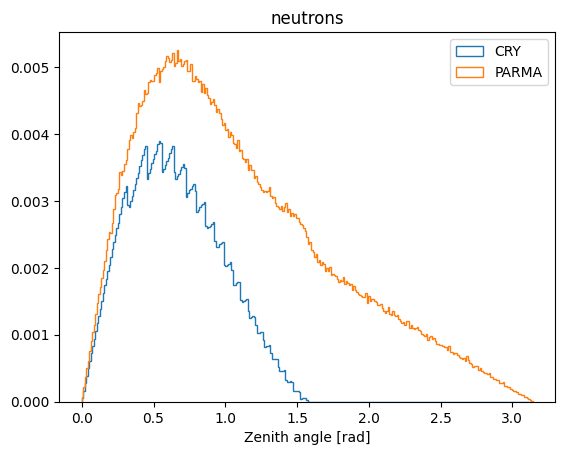

In [106]:
bins=np.linspace(0,np.pi,300)
plt.hist(data_cry["zenith_angle"], bins=bins,histtype="step", label="CRY", weights=np.ones(len(data_cry["zenith_angle"]))/cry_norm)
plt.hist(data_parma["zenith_angle"], bins=bins,histtype="step", label="PARMA", weights=np.ones(len(data_parma["zenith_angle"]))*parma_norm)
plt.xlabel("Zenith angle [rad]")
plt.legend()
plt.title("neutrons")
plt.savefig("fig_neutron_angle.png")


Text(0.5, 1.0, 'neutrons')

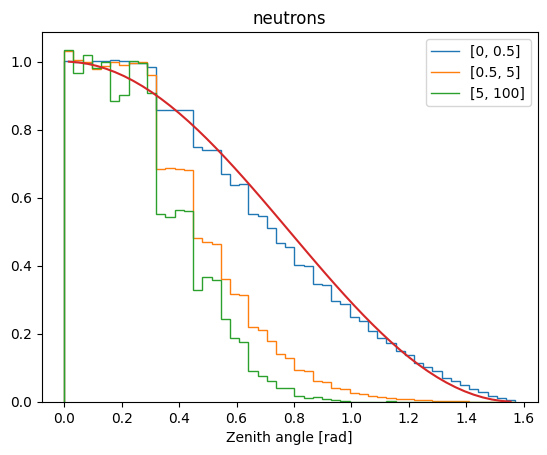

In [140]:
bins=np.linspace(0,np.pi/2,50)
bin_width = np.diff(bins)
bin_centers = bins[:-1] + 0.5*bin_width
bin_sr = [2*np.pi*np.sin(0.5*(bins[i]+bins[i+1])) * bin_width[i] for i in range(len(bin_width))]
e_edges = [0,0.5,5, 100]
for i in range(len(e_edges)-1):
    mask = (data_cry["ekin"] > e_edges[i]) & (data_cry["ekin"] <= e_edges[i+1])
    n,ibins = np.histogram(data_cry["zenith_angle"][mask], bins=bins)
    n =n/sum(n)/bin_sr
    n/=np.mean(n[:5])
    plt.stairs(n, ibins , label=f"[{e_edges[i]}, {e_edges[i+1]}]")

plt.plot(bin_centers, np.cos(bin_centers)**2)
plt.xlabel("Zenith angle [rad]")
plt.legend()
plt.title("neutrons")